# **Boulder urban forest traits project**
## Public Tree Inventory - Exploratory Analysis

In [16]:
import os
import cartopy.crs as ccrs
import earthpy as et
import earthpy.appeears as etapp
import geopandas as gpd
import pandas as pd
import numpy as np
import hvplot.pandas
import hvplot
# import geoviews as gv
import requests

In [3]:
project_dir = os.path.join(et.io.HOME, et.io.DATA_NAME, 'urban-forest-traits')
data_dir = os.path.join(project_dir, 'data')

for a_dir in [project_dir, data_dir]:
    if not os.path.exists(a_dir):
        os.makedirs(a_dir)

In [4]:
!ls $project_dir

data


### Download data

In [3]:
public_tree_url = 'https://gis.bouldercolorado.gov/ags_svr2/rest/services/parks/TreesOpenData/MapServer/0/query?outFields=*&where=1%3D1&f=geojson'

user_agent = (
        'Mozilla/5.0 (X11; Linux x86_64; rv:60.0) '
        'Gecko/20100101 Firefox/81.0'
    )

response = requests.get(public_tree_url,
                        headers={'User-Agent': user_agent})
public_tree_data = response.json()

public_tree_gdf = gpd.GeoDataFrame.from_features(public_tree_data['features'])
public_tree_gdf.crs = "EPSG:4326"
public_tree_gdf

geometry  OBJECTID FACILITYID SPECIESCD  \
0     POINT (-105.22100 40.02395)         1  TREE79142      FRPE   
1     POINT (-105.22103 40.02378)         2  TREE79143      FRPE   
2     POINT (-105.22109 40.02361)         3  TREE79144      CASP   
3     POINT (-105.22116 40.02349)         4  TREE79145      CASP   
4     POINT (-105.22174 40.02329)         5  TREE79146      FRAM   
...                           ...       ...        ...       ...   
1995  POINT (-105.25838 40.01603)      2064  TREE75903      GLTR   
1996  POINT (-105.25838 40.01611)      2065  TREE75904      GLTR   
1997  POINT (-105.25838 40.01619)      2066  TREE75905      GLTR   
1998  POINT (-105.25838 40.01627)      2067  TREE75906      GLTR   
1999  POINT (-105.25838 40.01635)      2068  TREE75907      CEOC   

                    FULLNAME               LATINNAME      GENUS CULTIVAR  \
0     Fraxinus pennsylvanica  Fraxinus pennsylvanica   Fraxinus     None   
1     Fraxinus pennsylvanica  Fraxinus pennsylvanica   Fraxinus     None   
2           Catalpa speciosa        Catalpa speciosa    Catalpa     None   
3           Catalpa speciosa        Catalpa speciosa    Catalpa     None   
4         Fraxinus americana      Fraxinus americana   Fraxinus     None   
...                      ...                     ...        ...      ...   
1995   Gleditsia triacanthos   Gleditsia triacanthos  Gleditsia     None   
1996   Gleditsia triacanthos   Gleditsia triacanthos  Gleditsia     None   
1997   Gleditsia triacanthos   Gleditsia triacanthos  Gleditsia     None   
1998   Gleditsia triacanthos   Gleditsia triacanthos  Gleditsia     None   
1999     Celtis occidentalis     Celtis occidentalis     Celtis     None   

               COMMONNAME     GENUSCOM  ...               MAINTBY OWNEDBY  \
0              Ash, Green          Ash  ...  Parks and Recreation    City   
1              Ash, Green          Ash  ...  Parks and Recreation    City   
2        Catalpa, Western      Catalpa  ...  Parks and Recreation    City   
3        Catalpa, Western      Catalpa  ...  Parks and Recreation    City   
4              Ash, White          Ash  ...  Parks and Recreation    City   
...                   ...          ...  ...                   ...     ...   
1995          Honeylocust  Honeylocust  ...          Public Works    City   
1996          Honeylocust  Honeylocust  ...          Public Works    City   
1997          Honeylocust  Honeylocust  ...          Public Works    City   
1998          Honeylocust  Honeylocust  ...          Public Works    City   
1999  Hackberry, Northern    Hackberry  ...          Public Works    City   

               TREEDIST                                GLOBALID PROPNAME  \
0     Northeast Boulder  {511B97EE-A1CF-49D3-8EE8-6897D4ABF868}     None   
1     Northeast Boulder  {EB01B286-7B24-4A2D-ABD6-C3CAC41F34D1}     None   
2     Northeast Boulder  {75239CC6-6A21-4FAF-93D0-FDB3680FBC15}     None   
3     Northeast Boulder  {D7616678-C732-4EA5-8560-5B9B100FD520}     None   
4     Northeast Boulder  {A21FA763-98E8-45C9-8BEE-7B7246EB70D1}     None   
...                 ...                                     ...      ...   
1995  Northeast Boulder  {C425066D-02E4-4661-9B1C-49EE4ACF3905}     None   
1996  Northeast Boulder  {6BAD4CBA-9624-45DC-A308-575E363CDA6A}     None   
1997  Northeast Boulder  {82F701F3-0B42-4E8E-BDE6-7B6C2D45DC62}     None   
1998  Northeast Boulder  {B9FD42C0-FDCF-4AEF-8BE4-BAADFB76D155}     None   
1999  Northeast Boulder  {995A6756-9A76-416B-8FB4-0DBBAA5977ED}     None   

     CONFIDENCE DATACONF DIVERSITYINDEX SPECIESINDEX OTHERINDEX  
0          None     None           None         None       None  
1          None     None           None         None       None  
2          None     None           None         None       None  
3          None     None           None         None       None  
4          None     None           None         None       None  
...         ...      ...            ...          ...        .

In [4]:
# Download public tree inventory data

print("Checking if data is downloaded...")
public_tree_path = os.path.join(project_dir, data_dir, 'public_trees.geojson')

# if os.path.exists(public_tree_path):
#     print("Data is already downloaded.")
#     trees_gdf = gpd.read_file(public_tree_path)
    
# else:
print("Data is not downloaded. Initiating download...")

# Define URL
public_trees_all_url = (
    'https://gis.bouldercolorado.gov/ags_svr2/rest/services/'
    'parks/TreesOpenData/MapServer/0/query?'
    'where=1%3D1&outFields=*&returnGeometry=false'
    '&returnIdsOnly=true&outSR=4326&f=json'
)

# Mimic web browser
user_agent = (
    'Mozilla/5.0 (X11; Linux x86_64; rv:60.0) '
    'Gecko/20100101 Firefox/81.0'
)

# Download GEOJSON
r = requests.get(url=public_trees_all_url, headers={'User-Agent': user_agent})
geojson_data = r.json()

# Extract the objectIDs (the indexes of the rows in the dataset)
objectid_list = geojson_data["objectIds"]

# Define chunks from the row numbers
chunks = [
    (objectid_list[i],
        objectid_list[min(i + 1000,
                            len(objectid_list)-1)])
    for i in range(0, len(objectid_list), 1000)
]
print("Data chunks identified.")

# # Due to the City of Boulder ArcGIS Hub limit of downloading
# # a maximum of 2,000 items at a time,
# # split the dataset into chunks and download the chunks individually.

# # Download data for each chunk
all_chunks_list = []
for (min_objectid, max_objectid) in chunks:

    # Define url
    public_trees_object_ids_url = (
        'https://gis.bouldercolorado.gov/ags_svr2/rest/services/'
        'parks/TreesOpenData/MapServer/0/query?'
        "where=OBJECTID%20%3E%3D%20{min_objectid}"
        "%20AND%20OBJECTID%20%3C%3D%20{max_objectid}"
        "&outFields=*&outSR=4326&f=geojson"
    )

    # Download chunk of data
    r = requests.get(url=public_trees_object_ids_url.format(
        min_objectid=min_objectid,
        max_objectid=max_objectid),
        headers={'User-Agent': user_agent})

    # Read GeoJSON data into a GeoDataFrame
    geojson_data = r.json()
    chunk_gdf = (gpd.GeoDataFrame
                        .from_features(geojson_data['features'])
    )
    all_chunks_list.append(chunk_gdf)

# Concatenate the chunk gdfs into one gdf
public_trees_all_gdf = pd.concat(all_chunks_list)

# Save downloaded data to CSV in directory
public_trees_all_gdf.to_file(public_tree_path, driver='GeoJSON', crs="EPSG:4326")

trees_gdf = gpd.read_file(public_tree_path)

Checking if data is downloaded...
Data is not downloaded. Initiating download...
Data chunks identified.


In [7]:
trees_gdf

OBJECTID  FACILITYID SPECIESCD                FULLNAME  \
0             1   TREE79142      FRPE  Fraxinus pennsylvanica   
1             2   TREE79143      FRPE  Fraxinus pennsylvanica   
2             3   TREE79144      CASP        Catalpa speciosa   
3             4   TREE79145      CASP        Catalpa speciosa   
4             5   TREE79146      FRAM      Fraxinus americana   
...         ...         ...       ...                     ...   
49868    119442  TREE292186   Unknown                 Unknown   
49869    119443  TREE292187   Unknown               Malus spp   
49870    119444  TREE292188   Unknown                 Unknown   
49871    119445  TREE292189   Unknown                 Unknown   
49872    119846  TREE292192   Unknown                 Unknown   

                    LATINNAME     GENUS CULTIVAR                 COMMONNAME  \
0      Fraxinus pennsylvanica  Fraxinus     None                 Ash, Green   
1      Fraxinus pennsylvanica  Fraxinus     None                 Ash, Green   
2            Catalpa speciosa   Catalpa     None           Catalpa, Western   
3            Catalpa speciosa   Catalpa     None           Catalpa, Western   
4          Fraxinus americana  Fraxinus     None                 Ash, White   
...                       ...       ...      ...                        ...   
49868                 Unknown   Unknown     None      Juniper Shrub - small   
49869               Malus spp     Malus     None  Crabapple unknown species   
49870                 Unknown   Unknown     None      Juniper Shrub - small   
49871                 Unknown   Unknown     None      Juniper Shrub - small   
49872                 Unknown   Unknown     None              Willow, Crack   

                 GENUSCOM  LEAFCYCLE  ...  OWNEDBY           TREEDIST  \
0                     Ash  Deciduous  ...     City  Northeast Boulder   
1                     Ash  Deciduous  ...     City  Northeast Boulder   
2                 Catalpa  Deciduous  ...     City  Northeast Boulder   
3                 Catalpa  Deciduous  ...     City  Northeast Boulder   
4                     Ash  Deciduous  ...     City  Northeast Boulder   
...                   ...        ...  ...      ...                ...   
49868             Unknown    Unknown  ...  Unknown               None   
49869  Apple or Crabapple  Deciduous  ...  Unknown               None   
49870             Unknown    Unknown  ...  Unknown               None   
49871             Unknown    Unknown  ...  Unknown               None   
49872             Unknown    Unknown  ...     City               None   

                                     GLOBALID        PROPNAME CONFIDENCE  \
0      {511B97EE-A1CF-49D3-8EE8-6897D4ABF868}            None       None   
1      {EB01B286-7B24-4A2D-ABD6-C3CAC41F34D1}            None       None   
2      {75239CC6-6A21-4FAF-93D0-FDB3680FBC15}            None       None   
3      {D7616678-C732-4EA5-8560-5B9B100FD520}            None       None   
4      {A21FA763-98E8-45C9-8BEE-7B7246EB70D1}            None       None   
...                                       ...             ...        ...   
49868  {E419463B-4BED-44AD-87D2-D6F527C98940}            None    Unknown   
49869  {4641476D-7738-4902-AE22-7400F11F40DE}            None    Unknown   
49870  {CB71FB93-F117-429B-AB09-82F62EA6B292}            None    Unknown   
49871  {D944086B-B082-44D5-9897-3115CB5F51C0}            None    Unknown   
49872  {05A8B279-F561-44CC-ABE1-D6BEAEF664F9}  Arrowwood Park    Unknown   

      DATACONF DIVERSITYINDEX SPECIESINDEX OTHERINDEX  \
0         None           None         None       None   
1         None           None         None       None   
2         None           None         None       None   
3         None           None         None       None   
4         None           None         None       None   
...        ...            ...          ...        ...   
49868     None           None         None       None   
49869     None           None  

In [35]:
public_trees_all_gdf 

geometry  OBJECTID  FACILITYID SPECIESCD  \
0    POINT (-105.22100 40.02395)         1   TREE79142      FRPE   
1    POINT (-105.22103 40.02378)         2   TREE79143      FRPE   
2    POINT (-105.22109 40.02361)         3   TREE79144      CASP   
3    POINT (-105.22116 40.02349)         4   TREE79145      CASP   
4    POINT (-105.22174 40.02329)         5   TREE79146      FRAM   
..                           ...       ...         ...       ...   
819  POINT (-105.28221 39.99870)    119442  TREE292186   Unknown   
820  POINT (-105.28219 39.99789)    119443  TREE292187   Unknown   
821  POINT (-105.28280 39.99960)    119444  TREE292188   Unknown   
822  POINT (-105.28297 39.99962)    119445  TREE292189   Unknown   
823  POINT (-105.25315 40.00249)    119846  TREE292192   Unknown   

                   FULLNAME               LATINNAME     GENUS CULTIVAR  \
0    Fraxinus pennsylvanica  Fraxinus pennsylvanica  Fraxinus     None   
1    Fraxinus pennsylvanica  Fraxinus pennsylvanica  Fraxinus     None   
2          Catalpa speciosa        Catalpa speciosa   Catalpa     None   
3          Catalpa speciosa        Catalpa speciosa   Catalpa     None   
4        Fraxinus americana      Fraxinus americana  Fraxinus     None   
..                      ...                     ...       ...      ...   
819                 Unknown                 Unknown   Unknown     None   
820               Malus spp               Malus spp     Malus     None   
821                 Unknown                 Unknown   Unknown     None   
822                 Unknown                 Unknown   Unknown     None   
823                 Unknown                 Unknown   Unknown     None   

                    COMMONNAME            GENUSCOM  ...               MAINTBY  \
0                   Ash, Green                 Ash  ...  Parks and Recreation   
1                   Ash, Green                 Ash  ...  Parks and Recreation   
2             Catalpa, Western             Catalpa  ...  Parks and Recreation   
3             Catalpa, Western             Catalpa  ...  Parks and Recreation   
4                   Ash, White                 Ash  ...  Parks and Recreation   
..                         ...                 ...  ...                   ...   
819      Juniper Shrub - small             Unknown  ...               Unknown   
820  Crabapple unknown species  Apple or Crabapple  ...               Unknown   
821      Juniper Shrub - small             Unknown  ...               Unknown   
822      Juniper Shrub - small             Unknown  ...               Unknown   
823              Willow, Crack             Unknown  ...  Parks and Recreation   

     OWNEDBY           TREEDIST                                GLOBALID  \
0       City  Northeast Boulder  {511B97EE-A1CF-49D3-8EE8-6897D4ABF868}   
1       City  Northeast Boulder  {EB01B286-7B24-4A2D-ABD6-C3CAC41F34D1}   
2       City  Northeast Boulder  {75239CC6-6A21-4FAF-93D0-FDB3680FBC15}   
3       City  Northeast Boulder  {D7616678-C732-4EA5-8560-5B9B100FD520}   
4       City  Northeast Boulder  {A21FA763-98E8-45C9-8BEE-7B7246EB70D1}   
..       ...                ...                                     ...   
819  Unknown               None  {E419463B-4BED-44AD-87D2-D6F527C98940}   
820  Unknown               None  {4641476D-7738-4902-AE22-7400F11F40DE}   
821  Unknown               None  {CB71FB93-F117-429B-AB09-82F62EA6B292}   
822  Unknown               None  {D944086B-B082-44D5-9897-3115CB5F51C0}   
823     City               None  {05A8B279-F561-44CC-ABE1-D6BEAEF664F9}   

           PROPNAME CONFIDENCE DATACONF DIVERSITYINDEX SPECIESINDEX OTHERINDEX  
0              None       None     None           None         None       None  
1              None       None     None           None         None       None  
2              None       None     None           None         None       None  
3              None       None     None           None         None       None  
4              None       None     None

In [40]:
public_trees_all_gdf.iloc[[44304, 44555]]

trees_gdf.iloc[[44304, 44555]]

OBJECTID FACILITYID SPECIESCD             FULLNAME  \
44304     46109  TREE87754     MASY2  Malus x Spring Snow   
44555     46364  TREE87706     MASY2  Malus x Spring Snow   

                 LATINNAME  GENUS     CULTIVAR              COMMONNAME  \
44304  Malus x Spring Snow  Malus  Spring Snow  Crabapple, Spring Snow   
44555  Malus x Spring Snow  Malus  Spring Snow  Crabapple, Spring Snow   

                 GENUSCOM  LEAFCYCLE  ... OWNEDBY            TREEDIST  \
44304  Apple or Crabapple  Deciduous  ...    City  Northeast Broadway   
44555  Apple or Crabapple  Deciduous  ...    City                Iris   

                                     GLOBALID PROPNAME CONFIDENCE DATACONF  \
44304  {5F43EABF-F3C6-4903-B213-76EBA6E87BDA}     None       None     None   
44555  {F86281D1-76B3-43D4-8FB4-7B15DF1516D9}     None       None     None   

      DIVERSITYINDEX SPECIESINDEX OTHERINDEX geometry  
44304           None         None       None     None  
44555           None         None       None     None  

[2 rows x 30 columns]

In [8]:
# Download parks in Boulder polygons

parks_url = 'https://gis.bouldercolorado.gov/ags_svr2/rest/services/parks/ParkSitesOpenData/MapServer/1/query?outFields=*&where=1%3D1&f=geojson'

response = requests.get(parks_url,
                        headers={'User-Agent': user_agent})
parks_data = response.json()

parks_gdf = gpd.GeoDataFrame.from_features(parks_data['features'])
parks_gdf.crs = "EPSG:4326"

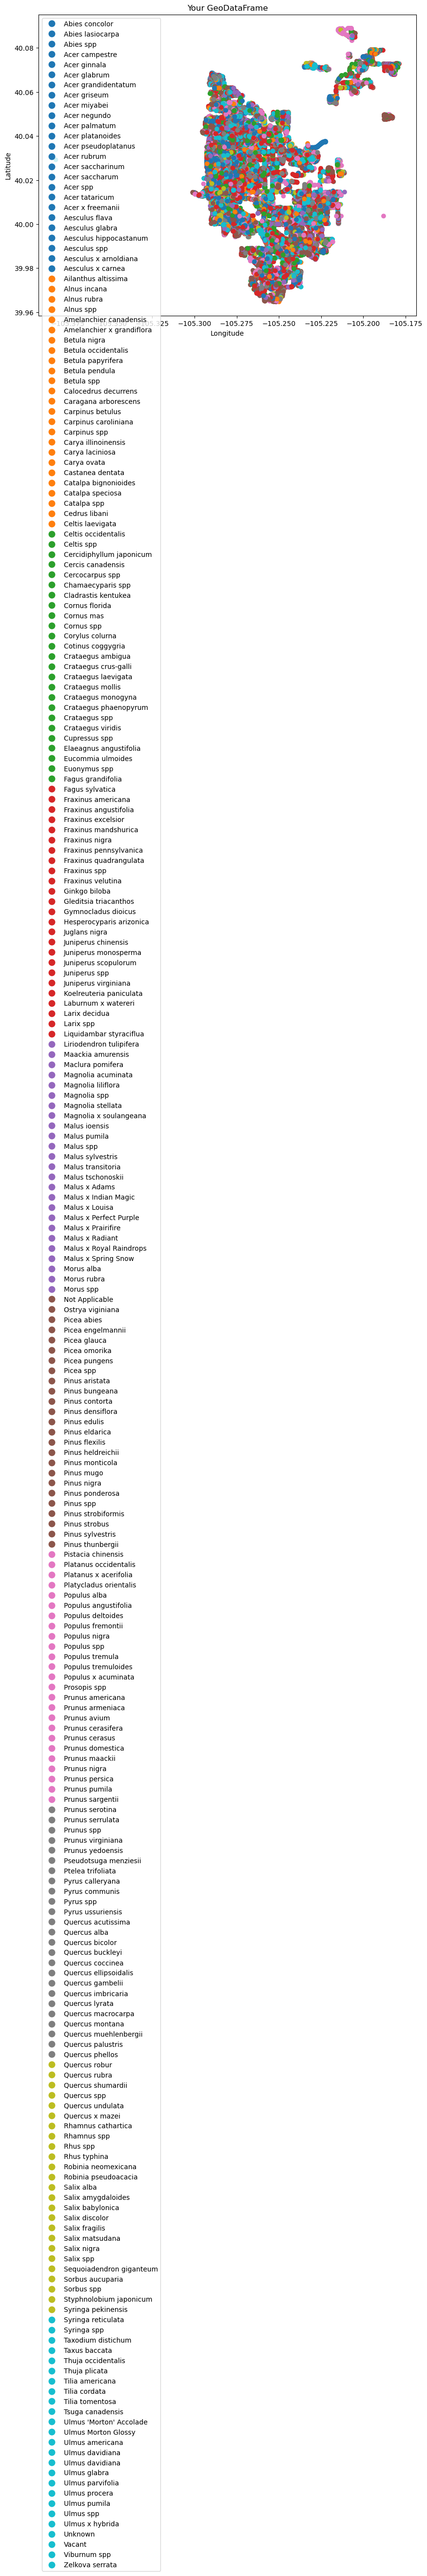

In [9]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# You can choose a column to color the plot, let's say 'population'
trees_gdf.plot(column='LATINNAME', ax=ax, legend=True)

# Add title and labels
plt.title('Your GeoDataFrame')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [11]:
trees_names_gdf = public_trees_all_gdf

# Remove non_strings
non_string_mask = trees_names_gdf['LATINNAME'].apply(lambda x: not isinstance(x, str))
trees_names_gdf = trees_names_gdf[~non_string_mask]
trees_names_gdf['LATINNAME_str'] = trees_names_gdf['LATINNAME'].astype(str)

trees_names_gdf.dtypes

/Users/advythramachandran/miniconda3/envs/earth-analytics-python/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


geometry          geometry
OBJECTID             int64
FACILITYID          object
SPECIESCD           object
FULLNAME            object
LATINNAME           object
GENUS               object
CULTIVAR            object
COMMONNAME          object
GENUSCOM            object
LEAFCYCLE           object
LEAFTYPE            object
DBHINT             float64
NOTETREE            object
PROJECT             object
ADDRESS             object
ZIPCODE             object
ONSTREET            object
LOCTYPE             object
SITETYPE            object
MAINTBY             object
OWNEDBY             object
TREEDIST            object
GLOBALID            object
PROPNAME            object
CONFIDENCE          object
DATACONF            object
DIVERSITYINDEX      object
SPECIESINDEX        object
OTHERINDEX          object
LATINNAME_str       object
dtype: object

In [19]:
trees_plot = trees_gdf.hvplot(
    geo=True,
    tiles='EsriImagery',
    alpha =0.5,
    size=10
)

trees_plot

TypeError: argument of type 'NoneType' is not iterable

In [30]:
print(trees_gdf.geom_type[trees_gdf.geom_type != 'Point'])

trees_dropped_gdf = trees_gdf.dropna(subset = ['geometry'])

44304    None
44555    None
dtype: object


In [18]:
trees_plot = trees_names_gdf.hvplot(
    geo=True,
    tiles='EsriImagery',
    alpha =0.5,
    size=10
)

trees_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]

In [15]:
trees_plot = public_tree_gdf.hvplot(
    geo=True,
    tiles='EsriImagery',
    alpha =0.5,
    size=10
)

trees_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]

In [41]:
trees_dropped_gdf

OBJECTID  FACILITYID SPECIESCD                FULLNAME  \
0             1   TREE79142      FRPE  Fraxinus pennsylvanica   
1             2   TREE79143      FRPE  Fraxinus pennsylvanica   
2             3   TREE79144      CASP        Catalpa speciosa   
3             4   TREE79145      CASP        Catalpa speciosa   
4             5   TREE79146      FRAM      Fraxinus americana   
...         ...         ...       ...                     ...   
49868    119442  TREE292186   Unknown                 Unknown   
49869    119443  TREE292187   Unknown               Malus spp   
49870    119444  TREE292188   Unknown                 Unknown   
49871    119445  TREE292189   Unknown                 Unknown   
49872    119846  TREE292192   Unknown                 Unknown   

                    LATINNAME     GENUS CULTIVAR                 COMMONNAME  \
0      Fraxinus pennsylvanica  Fraxinus     None                 Ash, Green   
1      Fraxinus pennsylvanica  Fraxinus     None                 Ash, Green   
2            Catalpa speciosa   Catalpa     None           Catalpa, Western   
3            Catalpa speciosa   Catalpa     None           Catalpa, Western   
4          Fraxinus americana  Fraxinus     None                 Ash, White   
...                       ...       ...      ...                        ...   
49868                 Unknown   Unknown     None      Juniper Shrub - small   
49869               Malus spp     Malus     None  Crabapple unknown species   
49870                 Unknown   Unknown     None      Juniper Shrub - small   
49871                 Unknown   Unknown     None      Juniper Shrub - small   
49872                 Unknown   Unknown     None              Willow, Crack   

                 GENUSCOM  LEAFCYCLE  ...  OWNEDBY           TREEDIST  \
0                     Ash  Deciduous  ...     City  Northeast Boulder   
1                     Ash  Deciduous  ...     City  Northeast Boulder   
2                 Catalpa  Deciduous  ...     City  Northeast Boulder   
3                 Catalpa  Deciduous  ...     City  Northeast Boulder   
4                     Ash  Deciduous  ...     City  Northeast Boulder   
...                   ...        ...  ...      ...                ...   
49868             Unknown    Unknown  ...  Unknown               None   
49869  Apple or Crabapple  Deciduous  ...  Unknown               None   
49870             Unknown    Unknown  ...  Unknown               None   
49871             Unknown    Unknown  ...  Unknown               None   
49872             Unknown    Unknown  ...     City               None   

                                     GLOBALID        PROPNAME CONFIDENCE  \
0      {511B97EE-A1CF-49D3-8EE8-6897D4ABF868}            None       None   
1      {EB01B286-7B24-4A2D-ABD6-C3CAC41F34D1}            None       None   
2      {75239CC6-6A21-4FAF-93D0-FDB3680FBC15}            None       None   
3      {D7616678-C732-4EA5-8560-5B9B100FD520}            None       None   
4      {A21FA763-98E8-45C9-8BEE-7B7246EB70D1}            None       None   
...                                       ...             ...        ...   
49868  {E419463B-4BED-44AD-87D2-D6F527C98940}            None    Unknown   
49869  {4641476D-7738-4902-AE22-7400F11F40DE}            None    Unknown   
49870  {CB71FB93-F117-429B-AB09-82F62EA6B292}            None    Unknown   
49871  {D944086B-B082-44D5-9897-3115CB5F51C0}            None    Unknown   
49872  {05A8B279-F561-44CC-ABE1-D6BEAEF664F9}  Arrowwood Park    Unknown   

      DATACONF DIVERSITYINDEX SPECIESINDEX OTHERINDEX  \
0         None           None         None       None   
1         None           None         None       None   
2         None           None         None       None   
3         None           None         None       None   
4         None           None         None       None   
...        ...            ...          ...        ...   
49868     None           None         None       None   
49869     None           None  

In [43]:
trees_names_gdf = trees_dropped_gdf

# Remove non_strings
non_string_mask = trees_names_gdf['LATINNAME'].apply(lambda x: not isinstance(x, str))
trees_names_gdf = trees_names_gdf[~non_string_mask]
# trees_names_gdf['LATINNAME_str'] = trees_names_gdf['LATINNAME'].astype(str)

trees_names_gdf.dtypes

OBJECTID             int64
FACILITYID          object
SPECIESCD           object
FULLNAME            object
LATINNAME           object
GENUS               object
CULTIVAR            object
COMMONNAME          object
GENUSCOM            object
LEAFCYCLE           object
LEAFTYPE            object
DBHINT             float64
NOTETREE            object
PROJECT             object
ADDRESS             object
ZIPCODE             object
ONSTREET            object
LOCTYPE             object
SITETYPE            object
MAINTBY             object
OWNEDBY             object
TREEDIST            object
GLOBALID            object
PROPNAME            object
CONFIDENCE          object
DATACONF            object
DIVERSITYINDEX      object
SPECIESINDEX        object
OTHERINDEX          object
geometry          geometry
dtype: object

In [52]:
trees_plot = trees_names_gdf.hvplot(
    geo=True,
    tiles='EsriImagery',
    alpha =0.5,
    size=10,
    hover_cols='GENUS',
    c='GENUS',
    legend=False
)

trees_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (GENUS)

In [55]:
trees_plot = trees_names_gdf.hvplot(
    geo=True,
    tiles='EsriImagery',
    alpha =0.5,
    size=10,
    # hover_cols='GENUS',
    # c='GENUS',
    legend=False,
    datashade=True, dynspread=True
)

trees_plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'7581cae6-4f94-4b4a-b27f-a9d39000c298': {'version…

In [24]:
parks_plot = parks_gdf.hvplot(
    geo=True,
    tiles='EsriImagery',
    alpha=0.5,
    hover_cols='NAME',
    legend=False
).opts(
    width=800,
    height=500
)

parks_plot
# parks_and_trees = (parks_plot * trees_plot).opts(
#     height=500,
#     width=800
# )

# hvplot.save(parks_and_trees, 'parks_and_trees.html')
# parks_and_trees

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (NAME)

## **Download Evapotranspiration data**

Data is already downloaded.


<Axes: >

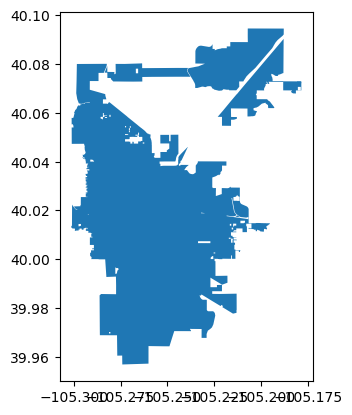

In [19]:
# Download City of Boulder boundary

boundary_url = ("https://gis.bouldercolorado.gov/ags_svr1/rest/services/plan/CityLimits/MapServer/0/query?outFields=*&where=1%3D1&f=geojson")

boundary_path = os.path.join(data_dir, 'city_boundary.geojson')

if os.path.exists(boundary_path):
    boundary_gdf = gpd.read_file(boundary_path)
    print("Data is already downloaded.")
else:
    # Mimic web browser
    user_agent = (
        'Mozilla/5.0 (X11; Linux x86_64; rv:60.0) '
        'Gecko/20100101 Firefox/81.0'
    )

    # Download GEOJSON
    r = requests.get(url=boundary_url, headers={'User-Agent': user_agent})

    # Read GeoJSON data into a GeoDataFrame
    boundary_geojson_data = r.json()

    # Cache
    boundary_gdf = (gpd.GeoDataFrame
                    .from_features(boundary_geojson_data['features'])
                    .to_file(boundary_path, driver="GeoJSON")
                    )
    
    # Read
    boundary_gdf = gpd.read_file(boundary_path)
    print("Data downloaded and loaded.")

boundary_gdf.plot()

In [20]:
# Ensure directory is set
os.chdir(os.path.join(data_dir))

current_directory = os.getcwd()

print("Current Working Directory:", current_directory)

Current Working Directory: /Users/advythramachandran/earth-analytics/data/urban-forest-traits/data


In [28]:
# Initialize AppeearsDownloader for MODIS NDVI data
evapot_downloader = etapp.AppeearsDownloader(
    download_key="modis-evapotranspiration", # optional
    ea_dir=data_dir,
    product="ECO3ETPTJPL.001",  # from list of APPEEARS datasts
    layer="EVAPOTRANSPIRATION_PT_JPL_ETcanopy",
    start_date="04-01",
    end_date="10-31",
    recurring=True,
    year_range=[2022],
    polygon=boundary_gdf,
)

evapot_downloader.login()

# # Download files if the download directory does not exist
# if not os.path.exists(evapot_downloader.data_dir):
#     evapot_downloader.download_files()

HTTPError: 401 Client Error: UNAUTHORIZED for url: https://appeears.earthdatacloud.nasa.gov/api/login

In [17]:
help(etapp.AppeearsDownloader)

Help on class AppeearsDownloader in module earthpy.appeears:

class AppeearsDownloader(builtins.object)
 |  AppeearsDownloader(product, layer, start_date, end_date, polygon, recurring=False, year_range=None, download_key='appeears', ea_dir=None, use_keyring=True)
 |  
 |  Class to download data using the appeears API
 |  
 |  appeears (Application for Extracting and Exploring Analysis 
 |  Ready Samples) offers a simple and efficient way to access 
 |  and transform geospatial data from a variety of federal (US)
 |  data archives. This class implements a subset of the API 
 |  features. Usage requires and Earthdata Login, available
 |  from https://urs.earthdata.nasa.gov/. More information 
 |  about the application is available at
 |  https://appeears.earthdatacloud.nasa.gov/.
 |  
 |  Parameters
 |  ----------
 |  download_key : str, optional
 |          Label used in data_dir and as the API job label
 |  ea_dir : pathlike, optional
 |          Replacement directory for ~/earth-analy

In [39]:
import pystac_client

pc_catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1"
)

pc_catalog.title

help(pystac_client.Client)

Help on class Client in module pystac_client.client:

class Client(pystac.catalog.Catalog, pystac_client.mixins.QueryablesMixin)
 |  Client(id: str, description: str, title: Optional[str] = None, stac_extensions: Optional[List[str]] = None, extra_fields: Optional[Dict[str, Any]] = None, href: Optional[str] = None, catalog_type: pystac.catalog.CatalogType = ABSOLUTE_PUBLISHED, *, modifier: Optional[Callable[[Union[pystac.collection.Collection, pystac.item.Item, pystac.item_collection.ItemCollection, dict]], NoneType]] = None, **kwargs: Dict[str, Any])
 |  
 |  A Client for interacting with the root of a STAC Catalog or API
 |  
 |  Instances of the ``Client`` class inherit from :class:`pystac.Catalog`
 |  and provide a convenient way of interacting
 |  with STAC Catalogs OR STAC APIs that conform to the `STAC API spec
 |  <https://github.com/radiantearth/stac-api-spec>`_.
 |  In addition to being a valid
 |  `STAC Catalog
 |  <https://github.com/radiantearth/stac-spec/blob/master/catalo

In [35]:
import pystac

In [32]:
help(pc_catalog.search)

Help on method search in module pystac_client.client:

search(*, method: Optional[str] = 'POST', max_items: Optional[int] = None, limit: Optional[int] = None, ids: Union[Tuple[str, ...], str, List[str], Iterator[str], NoneType] = None, collections: Union[List[str], Iterator[str], str, NoneType] = None, bbox: Union[Tuple[float, ...], List[float], Iterator[float], str, NoneType] = None, intersects: Union[str, pystac_client.item_search.GeoInterface, Dict[str, Any], NoneType] = None, datetime: Union[datetime.datetime, str, NoneType, Tuple[Union[datetime.datetime, str, NoneType], Union[datetime.datetime, str, NoneType]], List[Union[datetime.datetime, str, NoneType]], Iterator[Union[datetime.datetime, str, NoneType]]] = None, query: Union[Dict[str, Any], List[str], NoneType] = None, filter: Union[Dict[str, Any], str, NoneType] = None, filter_lang: Optional[str] = None, sortby: Union[List[Dict[str, str]], str, List[str], NoneType] = None, fields: Union[Dict[str, List[str]], str, List[str], No

In [44]:
help(pystac.Collection)

Help on class Collection in module pystac.collection:

class Collection(pystac.catalog.Catalog, pystac.asset.Assets)
 |  Collection(id: 'str', description: 'str', extent: 'Extent', title: 'str | None' = None, stac_extensions: 'list[str] | None' = None, href: 'str | None' = None, extra_fields: 'dict[str, Any] | None' = None, catalog_type: 'CatalogType | None' = None, license: 'str' = 'proprietary', keywords: 'list[str] | None' = None, providers: 'list[Provider] | None' = None, summaries: 'Summaries | None' = None, assets: 'dict[str, Asset] | None' = None)
 |  
 |  A Collection extends the Catalog spec with additional metadata that helps
 |  enable discovery.
 |  
 |  Args:
 |      id : Identifier for the collection. Must be unique within the STAC.
 |      description : Detailed multi-line description to fully explain the
 |          collection. `CommonMark 0.29 syntax <https://commonmark.org/>`_ MAY
 |          be used for rich text representation.
 |      extent : Spatial and temporal 

In [42]:
help(pc_catalog.search)

Help on method search in module pystac_client.client:

search(*, method: Optional[str] = 'POST', max_items: Optional[int] = None, limit: Optional[int] = None, ids: Union[Tuple[str, ...], str, List[str], Iterator[str], NoneType] = None, collections: Union[List[str], Iterator[str], str, NoneType] = None, bbox: Union[Tuple[float, ...], List[float], Iterator[float], str, NoneType] = None, intersects: Union[str, pystac_client.item_search.GeoInterface, Dict[str, Any], NoneType] = None, datetime: Union[datetime.datetime, str, NoneType, Tuple[Union[datetime.datetime, str, NoneType], Union[datetime.datetime, str, NoneType]], List[Union[datetime.datetime, str, NoneType]], Iterator[Union[datetime.datetime, str, NoneType]]] = None, query: Union[Dict[str, Any], List[str], NoneType] = None, filter: Union[Dict[str, Any], str, NoneType] = None, filter_lang: Optional[str] = None, sortby: Union[List[Dict[str, str]], str, List[str], NoneType] = None, fields: Union[Dict[str, List[str]], str, List[str], No

In [ ]:
chi_naip_search = pc_catalog.search(
    collections=["naip"],
    intersects=shapely.to_geojson(tract_geometry),
    datetime=f"{year}"
    )

In [1]:
import earthaccess

In [ ]:
datasets = earthaccess.search_datasets(
    keyword = "evapotranspiration",
    cloud_hosted= True,
    bounding_box = (-180, -90, 180, 90),
    temporal = ("2019", "2023")
)